# Neural Network for Sentiment Analysis

## Table of Contents
[Part I: Research Question](#P1)<br>
[A1](#A1)<br>
[A2](#A2)<br>
[A3](#A3)<br>
[Part II: Data Preparation](#P2)<br>
[B1](#B1)<br>
[B1a](#B1a)<br>
[B1b](#B1b)<br>
[B1c](#B1c)<br>
[B1d](#B1d)<br>
[B2](#B2)<br>
[B3](#B3)<br>
[B4](#B4)<br>
[B5](#B5)<br>
[B6](#B6)<br>
[Part III: Network Architecture](#P3)<br>
[C1](#C1)<br>
[C2](#C2)<br>
[C3](#C3)<br>
[Part IV: Model Evaluation](#P4)<br>
[D1](#D1)<br>
[D2](#D2)<br>
[D3](#D3)<br>
[D4](#D4)<br>
[Part V: Summary and Recommendations](#P5)<br>
[E](#E)<br>
[F](#F)<br>
[G](#G)<br>
[H](#H)<br>
[Code Sources](#I)<br>
[Additional Sources](#J)<br>

<a id="P1"></a>
## Part I: Research Question

<a id="A1"></a>
### A1. Research Question that will be answered using Neural Network Models and NLP Techniques, relevant to sentiment analysis captured in your chosen dataset(s). 

Utilizing neural network models and natural language processing techniques, is it possible to predict a customer's review sentiment and classify it as either positive or negative, based on the text of the review?

<a id="A2"></a>
### A2. Objectives/Goals of the Data Analysis given the scenario presented

The goal of this analysis is to build a neural network model that is able to predict a customer's sentiment, positive or negative, based on the text of their review.  The objective is to build a model capable of detecting patterns within existing customer reviews, so that it can be applied to future reviews.

<a id="A3"></a>
### A3. Identify a Type of Neural Network Capable of Performing a Text Classification Task that can be Trained to Produce Useful Predictions on Text Sequences on the Selected Data Set

Recurrent Neural Networks (RNN) are often used for sentiment analysis and tasks that require classification of text data.

<a id="P2"></a>
## Part II: Data Preparation

<a id="B1"></a>
### B1. Perform Exploratory Data Analysis on the Chosen Dataset, and include explanation of each of the following:

In [1]:
from platform import python_version
("Python version used during this analysis:", python_version())

('Python version used during this analysis:', '3.8.5')

In [2]:
import string
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns

#import statistics
#from scipy import stats

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

#!pip install plotly
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px

import sklearn
from sklearn import preprocessing
from sklearn import datasets
from sklearn.datasets import make_classification #for confusion matrix
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.svm import SVC #for confusion matrix

import nltk
from nltk.tokenize import word_tokenize, RegexpTokenizer, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
#code wasn't working correctly without downloading the following:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

import os
import datetime
import re
#!pip install wordcloud
#from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator #to make a word cloud
#from PIL import Image #pillow with wordcloud for image manipulation

import warnings
warnings.filterwarnings('ignore')
print("Done.")


Done.


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Jennifer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jennifer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Jennifer\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
import tensorflow as tf
#import tensorflow.keras
#from tensorflow.keras import *
#from tensorflow.keras import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
#from tensorflow.keras.layers import *
from tensorflow.keras.layers import LSTM, Dropout, Dense, Embedding
from tensorflow.keras.callbacks import EarlyStopping
print("Done.")

Done.


Adjusting Display Size

In [4]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
pd.set_option('display.max_columns', 80)
pd.set_option('max_colwidth', 400) #increasing panda's column width so I can see the whole review
print("Display size adjusted.")

Display size adjusted.


In [5]:
df_amazon=pd.read_csv('Desktop/WGU/D213/amazon_cells_labelled.txt', delimiter='\t', header=None)
df_imdb=pd.read_csv('Desktop/WGU/D213/imdb_labelled.txt', delimiter='\t', header=None)
df_yelp=pd.read_csv('Desktop/WGU/D213/yelp_labelled.txt', delimiter='\t', header=None)
print("Imported.")

Imported.


In [6]:
df_yelp.shape

(1000, 2)

In [7]:
df_amazon.shape

(1000, 2)

In [8]:
df_imdb.shape

(748, 2)

In [9]:
df=pd.concat((df_amazon, df_imdb, df_yelp), ignore_index=True)

In [10]:
df.shape

(2748, 2)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2748 entries, 0 to 2747
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       2748 non-null   object
 1   1       2748 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 43.1+ KB


In [12]:
df.columns=['review','sentiment'] #naming the columns
df['total_words'] = [len(x.split()) for x in df['review'].tolist()] #creating new column
df['total_char'] = df['review'].apply(len)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2748 entries, 0 to 2747
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review       2748 non-null   object
 1   sentiment    2748 non-null   int64 
 2   total_words  2748 non-null   int64 
 3   total_char   2748 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 86.0+ KB


In [14]:
df.head(30)

,review,sentiment,total_words,total_char
0,So there is no way for me to plug it in here in the US unless I go by a converter.,0,21,82
1,"Good case, Excellent value.",1,4,27
2,Great for the jawbone.,1,4,22
3,Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!,0,11,79
4,The mic is great.,1,4,17
5,I have to jiggle the plug to get it to line up right to get decent volume.,0,17,74
6,"If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.",0,21,111
7,If you are Razr owner...you must have this!,1,8,43
8,"Needless to say, I wasted my money.",0,7,35
9,What a waste of money and time!.,0,7,32


**Assessing for missing values**

In [15]:
df.isnull().sum()

review         0
sentiment      0
total_words    0
total_char     0
dtype: int64

No nulls present.

**Viewing summary statistics**

In [16]:
df.describe()

,sentiment,total_words,total_char
count,2748.000000,2748.00000,2748.000000
mean,0.504367,13.00655,71.528384
std,0.500072,35.81939,201.987266
min,0.000000,1.00000,7.000000
25%,0.000000,6.00000,32.000000
50%,1.000000,10.00000,55.000000
75%,1.000000,16.00000,87.000000
max,1.000000,1390.00000,7944.000000


**Converting Data to Lowercase**

In [17]:
df['review'] = df['review'].str.lower()

In [18]:
df.head()

,review,sentiment,total_words,total_char
0,so there is no way for me to plug it in here in the us unless i go by a converter.,0,21,82
1,"good case, excellent value.",1,4,27
2,great for the jawbone.,1,4,22
3,tied to charger for conversations lasting more than 45 minutes.major problems!!,0,11,79
4,the mic is great.,1,4,17


<a id="B1a"></a>
### B1a.) presence of unusual characters (e.g., emojis, non-English characters)

The regular expression module will be used below to remove punctuation, emojis and non-english characters. This will allow the words of the sentences to be properly tokenized for further analysis.

**Removing Punctuation:** The code below was sourced from Gupta (2023).

In [19]:
# Initial Character Count
document = df['review']
list_of_char = []
for wordle in document:
    for character in wordle:
        if character not in list_of_char:
            list_of_char.append(character)
number_of_char = len(list_of_char)
print("Number of Characters: ", number_of_char)
print(list_of_char)

Number of Characters:  65
['s', 'o', ' ', 't', 'h', 'e', 'r', 'i', 'n', 'w', 'a', 'y', 'f', 'm', 'p', 'l', 'u', 'g', 'b', 'c', 'v', '.', 'd', ',', 'x', 'j', '4', '5', '!', 'z', 'q', '+', '"', 'k', "'", '/', '7', '3', '6', '8', '0', '2', '?', '-', '1', ':', ')', '(', '&', '$', '*', ';', '%', '9', '#', '[', ']', '\x96', '\t', '\n', 'é', '\x85', 'å', '\x97', 'ê']


In [20]:
punc=re.compile(r'[^\w\s]+')   #[^ ... ] is a negated character class, which matches any character not in the specified set.
                               #\w matches any word character (letter, digit, or underscore).
                               #\s matches any whitespace character (space, tab, newline, etc.).
                               #+ quantifier matches one or more occurrences of the preceding pattern.
df['review'] = [punc.sub(' ', x) for x in df['review'].tolist()]

Ensuring punctuation was removed

In [21]:
punctuation = r'[^\w\s]'  #variable for punctuation
df['review'].str.contains(punctuation).sum()

0

In [22]:
document = df['review']
list_of_char = []
for wordle in document:
    for character in wordle:
        if character not in list_of_char:
            list_of_char.append(character)
number_of_char = len(list_of_char)
print("Number of Characters: ", number_of_char)
print(list_of_char)

Number of Characters:  43
['s', 'o', ' ', 't', 'h', 'e', 'r', 'i', 'n', 'w', 'a', 'y', 'f', 'm', 'p', 'l', 'u', 'g', 'b', 'c', 'v', 'd', 'x', 'j', '4', '5', 'z', 'q', 'k', '7', '3', '6', '8', '0', '2', '1', '9', '\t', '\n', 'é', '\x85', 'å', 'ê']


That didn't remove all of the punctuation. Repeating and specifying the special characters and punctuation it missed.

In [23]:
punc = re.compile(r'[éåê\x85\n\t]+')
df['review'] = [punc.sub(' ', x) for x in df['review'].tolist()]

In [24]:
document = df['review']
list_of_char = []
for wordle in document:
    for character in wordle:
        if character not in list_of_char:
            list_of_char.append(character)
number_of_char = len(list_of_char)
print("Number of Characters: ", number_of_char)
print(list_of_char)

Number of Characters:  37
['s', 'o', ' ', 't', 'h', 'e', 'r', 'i', 'n', 'w', 'a', 'y', 'f', 'm', 'p', 'l', 'u', 'g', 'b', 'c', 'v', 'd', 'x', 'j', '4', '5', 'z', 'q', 'k', '7', '3', '6', '8', '0', '2', '1', '9']


Punctuation removed.

<a id="B1b"></a>
### B1b.) vocabulary size

The code below determines the number of unique words within the sentences of the dataset. The code below was sourced from Python Spot (2023).

**Determining Original Vocabulary Size**

In [25]:
# Load stop words
stop_words = set(stopwords.words('english'))

# Tokenize original text data
list_sentences_tokenized = [word_tokenize(sentence) for sentence in df.review]

# Initialize tokenizer and fit on original text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts([" ".join(sentence) for sentence in list_sentences_tokenized])  # Fitting on original text data

# Get original vocabulary size
original_vocab_size = len(tokenizer.word_index) + 1
print("Original Vocabulary Size:", original_vocab_size)

Original Vocabulary Size: 5186


**Applying Stop Words**

In [26]:
stop_words = set(stopwords.words('english'))

#for loop that stop words and puts them into a list called 'list_sentences_no_stopwords'
#each list within the list 'list_sentences_no_stopwords' is a sentence from df['review'] with the stop words removed
list_sentences_no_stopwords=[ ]
for sentence in df.review:
    list_sentences_no_stopwords.append([word for word in word_tokenize(sentence) if word not in stop_words])
print(list_sentences_no_stopwords)

[['way', 'plug', 'us', 'unless', 'go', 'converter'], ['good', 'case', 'excellent', 'value'], ['great', 'jawbone'], ['tied', 'charger', 'conversations', 'lasting', '45', 'minutes', 'major', 'problems'], ['mic', 'great'], ['jiggle', 'plug', 'get', 'line', 'right', 'get', 'decent', 'volume'], ['several', 'dozen', 'several', 'hundred', 'contacts', 'imagine', 'fun', 'sending', 'one', 'one'], ['razr', 'owner', 'must'], ['needless', 'say', 'wasted', 'money'], ['waste', 'money', 'time'], ['sound', 'quality', 'great'], ['impressed', 'going', 'original', 'battery', 'extended', 'battery'], ['two', 'seperated', 'mere', '5', 'ft', 'started', 'notice', 'excessive', 'static', 'garbled', 'sound', 'headset'], ['good', 'quality', 'though'], ['design', 'odd', 'ear', 'clip', 'comfortable'], ['highly', 'recommend', 'one', 'blue', 'tooth', 'phone'], ['advise', 'everyone', 'fooled'], ['far', 'good'], ['works', 'great'], ['clicks', 'place', 'way', 'makes', 'wonder', 'long', 'mechanism', 'would', 'last'], ['we

In [27]:
#viewing and comparing the original first 5 sentences to the output above with stop words removed
df['review'].head() 

0    so there is no way for me to plug it in here in the us unless i go by a converter 
1                                                           good case  excellent value 
2                                                                great for the jawbone 
3        tied to charger for conversations lasting more than 45 minutes major problems 
4                                                                     the mic is great 
Name: review, dtype: object

In [28]:
# Initialize tokenizer for stop words removed sentences and fit on processed text data
tokenizer_no_stopwords = Tokenizer()
tokenizer_no_stopwords.fit_on_texts([" ".join(sentence) for sentence in list_sentences_no_stopwords])

# Get vocabulary size after stop words removal
vocab_size_no_stopwords = len(tokenizer_no_stopwords.word_index) + 1
print("Vocabulary Size after Stop Words Removal:", vocab_size_no_stopwords)

Vocabulary Size after Stop Words Removal: 5046


<a id="B1c"></a>
### B1c.) proposed word embedding length

The purpose of calculating the max sequence embedding length is to train the neural network with the data so that it is better able to predict the words that occur in concert (Huseby, 2020).

In [91]:
max_sequence_embedding=int(round(np.sqrt(np.sqrt(vocab_size_no_stopwords)),0))
max_sequence_embedding

8

<a id="B1d"></a>
### B1d.) statistical justification for the chosen maximum sequence length

The maximum sequence length chosen was the length of the longest sentence within the data. As seen below, the longest sentence contained 1,390 words. Selecting a value of the longest sequence length allows for better accuracy of the model. Truncating the longer sequences would have resulted in a loss of data (Bilogur, 2020). This number is reduced further in the data analysis process through removal of stop words and lemmatization.

In [29]:
df.describe()

,sentiment,total_words,total_char
count,2748.000000,2748.00000,2748.000000
mean,0.504367,13.00655,71.528384
std,0.500072,35.81939,201.987266
min,0.000000,1.00000,7.000000
25%,0.000000,6.00000,32.000000
50%,1.000000,10.00000,55.000000
75%,1.000000,16.00000,87.000000
max,1.000000,1390.00000,7944.000000


In [30]:
#Verifying there  actually is a review that is 1,390 words
df.sort_values(by='total_words', ascending=False)

,review,sentiment,total_words,total_char
1136,in fact it s hard to remember that the part of ray charles is being acted and not played by the man himself 1 ray charles is legendary 1 ray charles life provided excellent biographical material for the film which goes well beyond being just another movie about a musician 1 hitchcock is a great director 1 ironically i mostly find his films a total waste of time to watch 0 s...,0,1390,7944
1019,the structure of this film is easily the most tightly constructed in the history of cinema 1 i can think of no other film where something vitally important occurs every other minute 1 in other words the content level of this film is enough to easily fill a dozen other films 1 how can anyone in their right mind ask for anything more from a movie than this 1 it s quite simply the h...,0,865,4778
1646,with great sound effects and impressive special effects i can t recommend this movie enough 1 call me a nut but i think this is one of the best movies ever 1 great character actors telly savalas and peter boyle 1 1 hour 54 minutes of sheer tedium melodrama and horrible acting a mess of a script and a sinking feeling of good lord what were they thinking 0 lots of holes in th...,1,797,4487
1149,i love it 1 the ending is so so perfect you ll shed a tear 1 i am so thrilled after seeing a movie like this 1 i will never forget it now 1 it is not just a cult it is a cult classic 1 which has more depth and character than the man underneath it 0 the malta settings are as dry and as barren as the dialogue 0 this movie is terrible 0 the hockey scenes are terrible ...,0,302,1562
1135,you ll love it 1 this movie is bad 0 so bad 0 the film is way too long 0 this is definitely one of the bad ones 0 the movie i received was a great quality film for it s age 1 john wayne did an incredible job for being so young in the movie industry 1 his on screen presence shined thought even though there were other senior actors on the screen with him 1 i think that it...,1,199,1053
...,...,...,...,...
185,incredible,1,1,12
993,disappointed,0,1,13
1063,brilliant,1,1,12
1094,horrible,0,1,11


Choosing to set maximum sequence length to 1,391. Calculated by taking the maximum word length and adding one.

**Lemmatizing:** This code was sourced from Datacamp (n.d.). 

In [32]:
# Initialize tokenizer for preprocessed text data and fit on it
tokenizer_before_lemmatization = Tokenizer()
tokenizer_before_lemmatization.fit_on_texts([" ".join(sentence) for sentence in list_sentences_no_stopwords])

# Get vocabulary size before lemmatization
vocab_size_before_lemmatization = len(tokenizer_before_lemmatization.word_index) + 1

# Lemmatize the preprocessed text data
lemmatizer = WordNetLemmatizer()
def lem(token_text):
    return [lemmatizer.lemmatize(word) for word in token_text]

lemmatized_sentences = []

for sentence in list_sentences_no_stopwords:
    lemmatized_sentence = lem(sentence)  # Lemmatize the sentence
    lemmatized_sentences.append(lemmatized_sentence)  # Append the lemmatized sentence to the list

# No need to convert lemmatized sentences back to string format
# Initialize tokenizer for lemmatized text data and fit on lemmatized text
tokenizer_lemmatized = Tokenizer()
tokenizer_lemmatized.fit_on_texts(lemmatized_sentences)

# Get vocabulary size after lemmatization
vocab_size_after_lemmatization = len(tokenizer_lemmatized.word_index) + 1

# Print vocabulary sizes
print("Vocabulary Size before Lemmatization:", vocab_size_before_lemmatization)
print("Vocabulary Size after Lemmatization:", vocab_size_after_lemmatization)

Vocabulary Size before Lemmatization: 5046
Vocabulary Size after Lemmatization: 4651


**Tokenizing and Vectorizing:** The code below was sourced from Chen (2024).

In [33]:
# Converting lemmatized sentences to sequences
encoded_sentences = tokenizer_lemmatized.texts_to_sequences(lemmatized_sentences)

In [34]:
print(tokenizer_lemmatized.word_index) #dictionary

{'good': 1, 'movie': 2, 'great': 3, 'film': 4, 'phone': 5, 'one': 6, '0': 7, '1': 8, 'time': 9, 'like': 10, 'food': 11, 'place': 12, 'service': 13, 'work': 14, 'bad': 15, 'really': 16, 'well': 17, 'would': 18, 'best': 19, 'even': 20, 'ever': 21, 'also': 22, 'back': 23, 'go': 24, 'get': 25, 'quality': 26, 'love': 27, 'make': 28, 'character': 29, 'made': 30, 'product': 31, 'headset': 32, 'excellent': 33, 'sound': 34, 'could': 35, 'nice': 36, 'thing': 37, 'better': 38, 'never': 39, 'recommend': 40, 'much': 41, 'use': 42, 'way': 43, 'battery': 44, 'think': 45, 'first': 46, 'look': 47, 'price': 48, 'pretty': 49, 'see': 50, 'acting': 51, 'ear': 52, 'year': 53, 'say': 54, 'got': 55, 'worst': 56, 'still': 57, '2': 58, 'case': 59, 'minute': 60, '10': 61, 'everything': 62, 'enough': 63, 'two': 64, 'little': 65, 'disappointed': 66, 'every': 67, 'right': 68, 'going': 69, 'amazing': 70, 'scene': 71, 'waste': 72, 'people': 73, 'real': 74, 'definitely': 75, 'problem': 76, 'know': 77, 'terrible': 78, 

In [37]:
encoded_sentences

[[43, 248, 101, 469, 24, 2031],
 [1, 59, 33, 310],
 [3, 955],
 [2032, 123, 624, 956, 1318, 60, 1319, 76],
 [751, 3],
 [2033, 248, 25, 112, 68, 25, 375, 271],
 [272, 957, 272, 2034, 752, 958, 332, 753, 6, 6],
 [625, 376, 155],
 [959, 54, 333, 80],
 [72, 80, 9],
 [34, 26, 3],
 [156, 69, 334, 44, 1320, 44],
 [64, 2035, 2036, 157, 2037, 273, 1321, 2038, 960, 2039, 34, 32],
 [1, 26, 165],
 [249, 961, 52, 626, 148],
 [117, 40, 6, 543, 1322, 5],
 [754, 211, 2040],
 [95, 1],
 [14, 3],
 [2041, 12, 43, 28, 962, 102, 2042, 18, 124],
 [133, 250, 627, 2043, 544, 35, 25, 755],
 [134, 42, 2044, 963, 135, 136],
 [1323, 2045],
 [311, 628, 83, 44, 64, 212, 274, 91, 224, 629],
 [134, 964, 76, 44],
 [3, 756, 757, 5, 965],
 [630, 5, 631, 275, 54, 19, 632, 5],
 [45, 633, 634, 377],
 [73, 2046, 225, 166, 635, 1324, 166, 5],
 [312, 198],
 [413, 65, 5, 42, 2047, 2048],
 [31, 2049, 73, 10, 2050, 52, 2051],
 [1325, 636, 125, 2052, 966],
 [64, 53, 251, 1326, 414, 5],
 [125, 123, 17, 2053, 123, 758, 28, 199, 39, 6

In [35]:
print(df.review[0])
print(encoded_sentences[0])

so there is no way for me to plug it in here in the us unless i go by a converter 
[43, 248, 101, 469, 24, 2031]


<a id="B2"></a>
### B2. Describe the Goals of the Tokenization Process, including Any Code Generated and Packages that are Used to Normalize Text During the Tokenization Process

The goals of tokenization were to implement processes for removing stop words, lemmatizing, vectorizing, and padding the data. The tokenization above utilized the Tokenizer class from the Preprocessing module within TensorFlow.Keras. The WordNetLemmatizer, word_tokenizer, and stopwords modules from Natural Language Toolkit (nltk) were used to lemmatize the words and remove the stop words. The regular expressions module (re) was used above as well to remove punctuation from the sentences.

<a id="B3"></a>
### B3. Explain the padding process used to standardize the length of sequences. Include the following in your explanation:
#### if the padding occurs before or after the text sequence and a screenshot of a single padded sequence

The data input for TensorFlow needs to be equal length, the padding process achieves that requirement. The maximum length of the sequences was calculated first; the result of that calculation was 781. This value was used to apply the padding for each sentence of the list. The pad_sequences function from TensorFlow Keras was used to post-pad each sentence so that they would all be of equal length (781). Post-padding means that the extra zeros are added to the end of each sequence. The code below was sourced from Chen (2024).

In [38]:
# Find the length of the longest sentence
max_length = max(len(sentence) for sentence in encoded_sentences)

# Pad the encoded sentences to the length of the longest sentence
padded_sentences = pad_sequences(encoded_sentences, maxlen=max_length, padding='post', truncating='post')

# Print the padded sentences
print(padded_sentences)

[[  43  248  101 ...    0    0    0]
 [   1   59   33 ...    0    0    0]
 [   3  955    0 ...    0    0    0]
 ...
 [ 175  156   18 ...    0    0    0]
 [ 260   82 1922 ...    0    0    0]
 [ 333   63   86 ...    0    0    0]]


In [39]:
max_length

781

In [40]:
print(padded_sentences[0])

[  43  248  101  469   24 2031    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [41]:
padded_sentences.shape

(2748, 781)

<a id="B4"></a>
### B4. Identify how many categories of sentiment will be used and an activation function for the final dense layer of the network

Two categories of sentiment will be used, as the sentiment scores are 0 or 1. A positive sentiment was given a value of 1 and a negative sentiment was given a value of 0 (Kotzias et al., 2015).

Since there are two categories of sentiment, it is a binary classification task. A sigmoid activation function will be used in the final dense layer, as this is a binary classification task. If there were more than one category of sentiment, a different activation function would have been chosen for the final dense layer of the network.

<a id="B5"></a>
### B5. Explain the Steps You Used to Prepare the Data for Analysis, Including the Size of the Training, Validation and Test Set Split (Based on the Industry Average)

The code below was sourced from Ebner (2022). Given the large dataset, a 90:10 data split ratio was chosen, where 90% of the data is used to train the model, and 10% is used to test the model (Kumar, 2021).

In [45]:
X=padded_sentences
y=df[['sentiment']]
print('X:',X.shape)
print('y',y.shape)
# Creating training and test sets and setting random state for reproducibility
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.10, random_state=1, stratify=y)
print('X_train: {}'.format(X_train.shape))
print('y_train: {}'.format(y_train.shape))
print('X_test: {}'.format(X_test.shape))
print('y_test: {}'.format(y_test.shape))

X: (2748, 781)
y (2748, 1)
X_train: (2473, 781)
y_train: (2473, 1)
X_test: (275, 781)
y_test: (275, 1)


<a id="B6"></a>
### B6. Copy of Prepared Data Set

In [47]:
# Convert NumPy arrays to DataFrames
X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)
y_train_df = pd.DataFrame(y_train)
y_test_df = pd.DataFrame(y_test)

# Save DataFrames to CSV files
X_train_df.to_csv('D213_SA_X_train.csv', index=False)
X_test_df.to_csv('D213_SA_X_test.csv', index=False)
y_train_df.to_csv('D213_SA_y_train.csv', index=False)
y_test_df.to_csv('D213_SA_y_test.csv', index=False)

<a id="P3"></a>
## Part III: Network Architecture

<a id="C1"></a>
### C1. Provide the Output of the Model Summary of the Function from TensorFlow

The code below was sourced from Mayo (2018).

In [42]:
padded_sentences.shape

(2748, 781)

In [73]:
max_length = max(len(sentence) for sentence in X_train)
max_length

781

In [48]:
#Starting with a basic model before adjusting hyperparameters
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(781,)))  #retreived from padded_sentences.shape
model.add(Dense(32, activation='relu'))  
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                50048     
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 52161 (203.75 KB)
Trainable params: 52161 (203.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [49]:
early_stopping_monitor=EarlyStopping(patience=2)
history = model.fit(X_train, y_train, epochs = 5, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/5
20/20 [==============================] - 1s 14ms/step - loss: 18.5361 - accuracy: 0.5160 - val_loss: 15.9278 - val_accuracy: 0.5018
Epoch 2/5
20/20 [==============================] - 0s 4ms/step - loss: 6.9680 - accuracy: 0.5216 - val_loss: 12.0948 - val_accuracy: 0.5382
Epoch 3/5
20/20 [==============================] - 0s 4ms/step - loss: 4.6725 - accuracy: 0.5180 - val_loss: 10.7441 - val_accuracy: 0.5164
Epoch 4/5
20/20 [==============================] - 0s 4ms/step - loss: 3.3668 - accuracy: 0.5265 - val_loss: 10.0982 - val_accuracy: 0.4982
Epoch 5/5
20/20 [==============================] - 0s 4ms/step - loss: 3.1796 - accuracy: 0.5576 - val_loss: 10.0799 - val_accuracy: 0.5055


**Adding layers and adjusting hyperparameters to try to improve accuracy**

In [53]:
#Adjusting hyperparameters
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(781,)))
model.add(Dropout(0.5))  # Adding dropout for regularization
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))  # Adding another dropout layer
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               100096    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 dense_15 (Dense)            (None, 1)                 33        
                                                                 
Total params: 110465 (431.50 KB)
Trainable params: 110

In [55]:
early_stopping_monitor=EarlyStopping(patience=2)
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/5
39/39 [==============================] - 0s 5ms/step - loss: 1.1163 - accuracy: 0.5305 - val_loss: 0.9247 - val_accuracy: 0.4764
Epoch 2/5
39/39 [==============================] - 0s 4ms/step - loss: 1.1985 - accuracy: 0.5208 - val_loss: 0.7698 - val_accuracy: 0.4982
Epoch 3/5
39/39 [==============================] - 0s 4ms/step - loss: 1.4887 - accuracy: 0.5071 - val_loss: 0.7425 - val_accuracy: 0.5309
Epoch 4/5
39/39 [==============================] - 0s 4ms/step - loss: 1.0087 - accuracy: 0.5257 - val_loss: 0.7071 - val_accuracy: 0.5055
Epoch 5/5
39/39 [==============================] - 0s 4ms/step - loss: 1.0359 - accuracy: 0.5119 - val_loss: 0.7199 - val_accuracy: 0.5164


In [92]:
#Adjusting again
vocab_size=4652
embed_size=8
model = Sequential()
model.add(Embedding(vocab_size, embed_size, input_length=781)) 
model.add(Dense(64, activation='tanh', input_shape=(781,)))  #retreived from padded_sentences.shape
model.add(Dropout(0.5))
model.add(Dense(32, activation='tanh'))
model.add(Dropout(0.5)) 
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 781, 8)            37216     
                                                                 
 dense_35 (Dense)            (None, 781, 64)           576       
                                                                 
 dropout_16 (Dropout)        (None, 781, 64)           0         
                                                                 
 dense_36 (Dense)            (None, 781, 32)           2080      
                                                                 
 dropout_17 (Dropout)        (None, 781, 32)           0         
                                                                 
 dense_37 (Dense)            (None, 781, 1)            33        
                                                                 
Total params: 39905 (155.88 KB)
Trainable params: 399

In [93]:
early_stopping_monitor=EarlyStopping(patience=2)
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/5
39/39 [==============================] - 5s 103ms/step - loss: 0.6936 - accuracy: 0.4964 - val_loss: 0.6931 - val_accuracy: 0.5069
Epoch 2/5
39/39 [==============================] - 4s 94ms/step - loss: 0.6936 - accuracy: 0.4937 - val_loss: 0.6931 - val_accuracy: 0.5065
Epoch 3/5
39/39 [==============================] - 4s 98ms/step - loss: 0.6935 - accuracy: 0.5010 - val_loss: 0.6931 - val_accuracy: 0.4946
Epoch 4/5
39/39 [==============================] - 4s 96ms/step - loss: 0.6933 - accuracy: 0.4982 - val_loss: 0.6931 - val_accuracy: 0.5074
Epoch 5/5
39/39 [==============================] - 4s 93ms/step - loss: 0.6936 - accuracy: 0.4845 - val_loss: 0.6931 - val_accuracy: 0.5074


In [94]:
#And again
vocab_size=4652
embed_size=8
model = Sequential()
model.add(Embedding(vocab_size, embed_size, input_length=781)) 
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dense(64, activation='tanh', input_shape=(781,)))  #retreived from padded_sentences.shape
model.add(Dropout(0.2))
model.add(Dense(32, activation='tanh'))
model.add(Dropout(0.2)) 
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()
early_stopping_monitor=EarlyStopping(patience=2)
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 781, 8)            37216     
                                                                 
 lstm_12 (LSTM)              (None, 50)                11800     
                                                                 
 dense_38 (Dense)            (None, 64)                3264      
                                                                 
 dropout_18 (Dropout)        (None, 64)                0         
                                                                 
 dense_39 (Dense)            (None, 32)                2080      
                                                                 
 dropout_19 (Dropout)        (None, 32)                0         
                                                                 
 dense_40 (Dense)            (None, 1)               

In [68]:
#and again.............this is model#10. I deleted some of the older ones
vocab_size = 4652
embed_size = 8

model = Sequential()
model.add(Embedding(vocab_size, embed_size, input_length=781)) 
model.add(LSTM(100, dropout=0.5, recurrent_dropout=0.5, return_sequences=True))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5)) 
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()

early_stopping_monitor = EarlyStopping(patience=2)
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 781, 32)           148864    
                                                                 
 lstm_2 (LSTM)               (None, 781, 100)          53200     
                                                                 
 lstm_3 (LSTM)               (None, 50)                30200     
                                                                 
 dense_22 (Dense)            (None, 64)                3264      
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_23 (Dense)            (None, 32)                2080      
                                                                 
 dropout_9 (Dropout)         (None, 32)              

In [82]:
#model 14..fingers crossed
from tensorflow.keras.layers import SpatialDropout1D

model = Sequential()
model.add(Embedding(vocab_size, embed_size, input_length=781))
model.add(SpatialDropout1D(0.2))  # Spatial dropout for embedding layer
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

early_stopping_monitor = EarlyStopping(patience=2)
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping_monitor])

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 781, 32)           148864    
                                                                 
 spatial_dropout1d (Spatial  (None, 781, 32)           0         
 Dropout1D)                                                      
                                                                 
 lstm_8 (LSTM)               (None, 781, 128)          82432     
                                                                 
 lstm_9 (LSTM)               (None, 64)                49408     
                                                                 
 dense_31 (Dense)            (None, 64)                4160      
                                                                 
 dropout_14 (Dropout)        (None, 64)                0         
                                                     

In [83]:
from tensorflow.keras.layers import SpatialDropout1D

model = Sequential()
model.add(Embedding(vocab_size, embed_size, input_length=781))
model.add(SpatialDropout1D(0.5))  # Spatial dropout for embedding layer
model.add(LSTM(128, dropout=0.5, recurrent_dropout=0.5, return_sequences=True))
model.add(LSTM(64, dropout=0.5, recurrent_dropout=0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

early_stopping_monitor = EarlyStopping(patience=2)
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping_monitor])

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 781, 32)           148864    
                                                                 
 spatial_dropout1d_1 (Spati  (None, 781, 32)           0         
 alDropout1D)                                                    
                                                                 
 lstm_10 (LSTM)              (None, 781, 128)          82432     
                                                                 
 lstm_11 (LSTM)              (None, 64)                49408     
                                                                 
 dense_33 (Dense)            (None, 64)                4160      
                                                                 
 dropout_15 (Dropout)        (None, 64)                0         
                                                     

<a id="C2"></a>
### C2. Discuss the Number of Layers, the Type of Layers, and the Total Number of Parameters

My final model consists of 7 layers. The first is an embedding layer, followed by the SpatialDropout1D layer, then 2 LSTM layers, then 1 dense layer, then a dropout layer, and finally a dense output layer. 
The embedding layer converts the input length I provided into vectors of the specified embed_size. The SpatialDropout1D layer randomly drops rows based on the given frequency. The Long Short-Term Memory (LSTM) layers are a type of Recurrent Neural Network (RNN) layers which can capture the long-term dependencies within the data. The dense layers are fully connected layers. They connect to the previous layer, one of the dense layers has a ReLU activation and the other is the output layer and has a sigmoid activation. The total number of parameters is 284,929 (note: I may try a couple more model iterations before submission, so this number may change slightly, however it is available in the model summary of the last model above, immediately after "Total params").

<a id="C3"></a>
### C3. Justify the Choice of Hyperparameters, including the following elements:
#### activation functions, number of nodes per layer, loss function, optimizer, stopping criteria, evaluation metric

Activation Functions: The rectified linear units (ReLu) activation allows models to generate the output quicker and be more accurate and are often used in hidden layers because they can overcome the vanishing gradient issue (Brownlee, 2020). The sigmoid activation is often used at the output layer for binary classification tasks.

Number of nodes per layer: The nodes were adjusted several times throughout the 15 model iterations in an attempt to improve accuracy of the model. The final nodes were 128 and 64 for the LSTM layers and 64 for the hidden dense layer. 

Loss Function:Since this model was a binary classification task, binary cross-entropy is the most commonly used loss function. It calculates the difference between the binary labels and the predicted probabilities of the output. 

Optimizer: The Adam optimizer was chosen for its advantages over other optimizers. It is able to adapt the learning rate for each parameter, which allows for a faster convergence.

Stopping Criteria: A patience of 2 means that the training will cease if the validation loss does not improve for two consecutive epochs. 

Evaluation metric: Model.evaluate will be used in section D3 below to evaluate the model. It will calculate the model loss and accuracy. It can be helpful to detect overfitting, underfitting and convergence issues.

<a id="P4"></a>
## Part IV: Model Evaluation

<a id="D1"></a>
### D1. Discuss the impact of using stopping criteria to include defining the number of epochs, including a screenshot showing the final training epoch

Utilizing stopping criteria prevents overfitting, conserves computer resources and stops the epoch iterations when the model isn't improving and has hit a plateau. The epochs can be seen in section C1 above.

<a id="D2"></a>
### D2. Assess the fitness of the model and any actions taken to address overfitting

Early stopping was implemented with a patience of 2, and the hyperparameters were adjusted throughout the 15 model iterations to address any overfitting if it occurred.

<a id="D3"></a>
### D3. Provide visualizations of the model’s training process, including a line graph of the loss and chosen evaluation metric

In [86]:
result=model.evaluate(X_test, y_test, verbose = 0)
print ('Test Loss:', result[0])
print ('Test accuracy:', result[1])

Test Loss: 0.693087637424469
Test accuracy: 0.5054545402526855


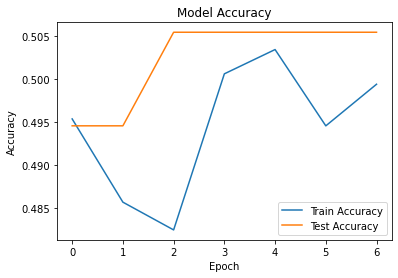

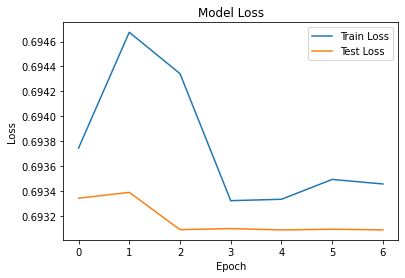

In [88]:
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.legend()
plt.show()

plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend()
plt.show()

<a id="D4"></a>
### D4. Discuss the predictive accuracy of the trained network using the chosen evaluation metric from part D3

The training loss and validation loss values are very close, at around 70%. The training accuracy and validation accuracy are both around 50%. At 50%, the model is no better than guessing at random. This shows that the model is not capturing underlying patterns within the data. 

<a id="P5"></a>
## Part V: Summary and Recommendations

<a id="E"></a>
### E. Provide the Code You Used to Save the Trained Network Within the Neural Network

In [89]:
model.save('trained_model.keras')

<a id="F"></a>
### F. Discuss the functionality of your neural network, including the impact of the network architecture

The data consisted of 2,748 customer reviews. 2,473 of those reviews were used to train the model, and 275 were used to test the model. If the model was more accurate, it could have been used to predict customer sentiment based on the text of their review, to determine if their review had a positive or negative sentiment.
The architecture of the neural network did not improve the accuracy. That architecture could be adjusted in the future in an effort to improve the model. However, with accuracy around 50%, the architecture possibly hindered the model.

<a id="G"></a>
### G. Recommended Course of Action

Given the low predictive accuracy of the model, the organizations should not use the model for decision-making processes. The organizations could conduct a thorough evaluation of the model by further adjusting the hyperparameters, sizes of the training data, and the architecture of the model. However, the organizations could also look to the data quality and data size.  Regardless of the course of action taken, this model is not ready to be implemented with an accuracy score of around 50%.

<a id="I"></a>
### Code Sources

Chen, A. (2024). *Deep learning: A simple example.* Github. https://alvinntnu.github.io/NTNU_ENC2045_LECTURES/nlp/dl-simple-case.html

Datacamp. (n.d). *Sentiment Analysis*. https://app.datacamp.com/learn/courses/sentiment-analysis-in-python

Ebner, J. (2022). *How to use sklearn train_test_split in python.* Sharp Sight. https://www.sharpsightlabs.com/blog/scikit-train_test_split/

Gupta, K. (2023). *Remove punctuation from string using python (4 best methods).* Favtutor. https://favtutor.com/blogs/remove-punctuation-from-string-python

Kumar, A. (2021). *Machine learning - training, validation and test data set.* Analytics Yogi. https://vitalflux.com/machine-learning-training-validation-test-data-set/

Mayo, M. (2018). *Building a basic Keras neural network sequential model.* KD Nuggets. https://www.kdnuggets.com/2018/06/basic-keras-neural-network-sequential-model.html

Python Spot. (2023). *NLTK stop words.* https://pythonspot.com/nltk-stop-words/

<a id="J"></a>
### Additional Sources

Bilogur, A. (2020). *Techniques for handling sequence length in RNNs.* Kaggle. https://www.kaggle.com/code/residentmario/techniques-for-handling-sequence-length-in-rnns

Brownlee, J. (2020). *A gentle introduction to the rectified linear unit (ReLU).* Machine Learning Mastery. https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/

Huseby, K. (2020). *Word embeddings, what are they?* Towards Data Science. https://towardsdatascience.com/word-embeddings-what-are-they-really-f106e1ff0874

Kotzias, D., Denil, M., Freitas, N.D., & Smyth, P. (2015). From Group to Individual Labels Using Deep Features. *Proceedings of the 21th ACM SIGKDD International Conference on Knowledge Discovery and Data Mining.* DOI:10.1145/2783258.2783380